# 聚类

## 加载训练数据

In [1]:
# beer dataset
import pandas as pd
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
X = beer[["calories","sodium","alcohol","cost"]]

## K-means clustering

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [4]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [5]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0


In [6]:
from pandas.plotting import scatter_matrix

%matplotlib inline

cluster_centers = km.cluster_centers_

cluster_centers_2 = km2.cluster_centers_

In [7]:
# 观察数据差异
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,0
1,102.75,10.0,4.075000,0.440000,1
2,70.00,10.5,2.600000,0.420000,1


In [8]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,0.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


In [9]:
centers = beer.groupby("cluster").mean().reset_index()

## 画图

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [11]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'Alcohol')

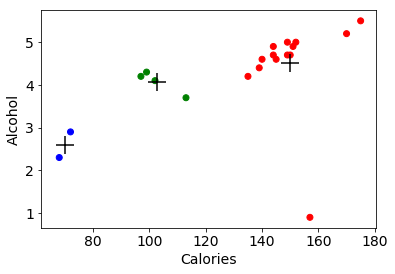

In [12]:
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

从图中可以发现有三类数据，最左边只有两个样本，中间有四个样本，最右边的类样本最多。

Text(0.5, 0.98, 'With 3 centroids initialized')

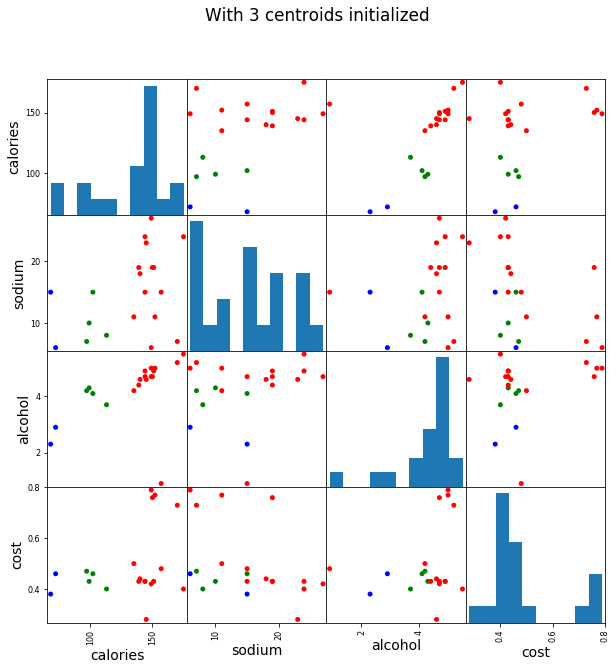

In [13]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

Text(0.5, 0.98, 'With 2 centroids initialized')

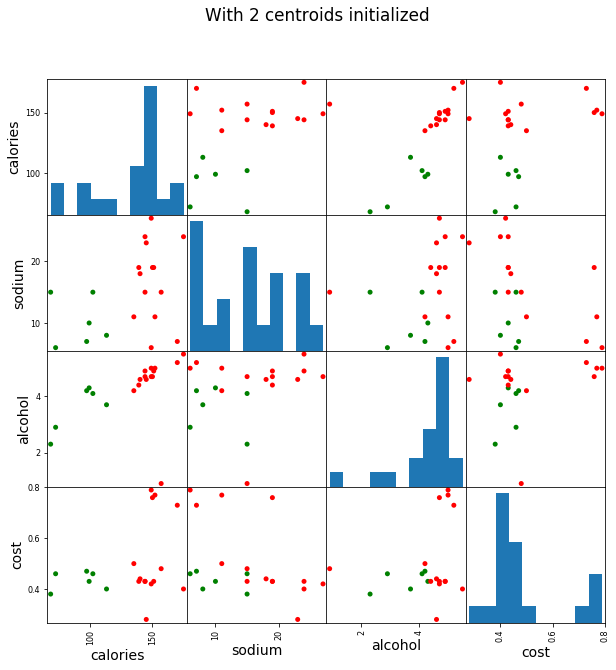

In [14]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

## Scaled data（标准化/归一化）

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [16]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [17]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
9,Budweiser_Light,113,8,3.7,0.40,1,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,0
12,Michelob_Light,135,11,4.2,0.50,0,0,0
11,Coors_Light,102,15,4.1,0.46,1,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,2,1,0
8,Miller_Lite,99,10,4.3,0.43,1,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,1,0
2,Lowenbrau,157,15,0.9,0.48,0,0,0
4,Heineken,152,11,5.0,0.77,0,0,1
3,Kronenbourg,170,7,5.2,0.73,0,0,1


What are the "characteristics" of each cluster?

In [18]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,105.375,10.875,3.3250,0.4475,1.0,0.75
1,155.250,10.750,4.9750,0.7625,0.0,0.00
2,148.375,21.125,4.7875,0.4075,0.0,0.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002CFC9F60>,
      dtype=object)

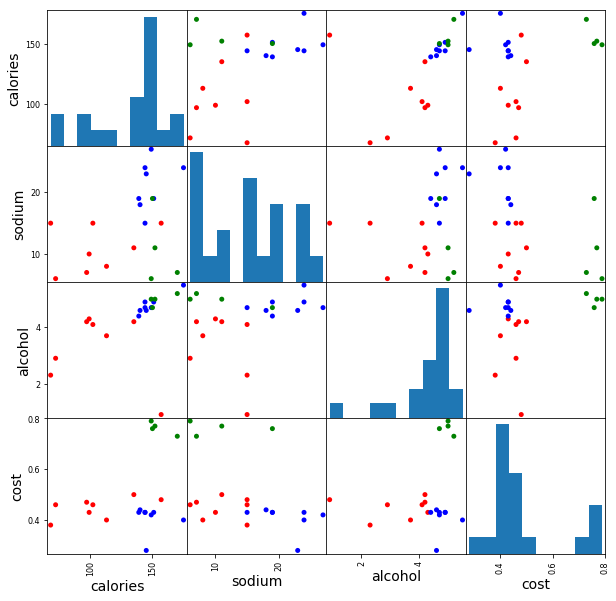

In [19]:
scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

## 聚类评估：轮廓系数（Silhouette Coefficient ）

$$
s(i)=\frac{b(i)-a(i)}{\max \{a(i), b(i)\}} \Rightarrow
s(i)=\left\{\begin{array}{cc}{\displaystyle 1-\frac{a(i)}{b(i)},} & {a(i)<b(i)} \\ {0,} & {a(i)=b(i)} \\ {\displaystyle \frac{b(i)}{a(i)}-1,} & {a(i)>b(i)}\end{array}\right.
$$

- 计算样本$i$到同簇其他样本的平均距离$a_i$。$a_i$越小，说明样本$i$越应该被聚类到该簇。将$a_i$称为样本$i$的簇内不相似度。
- 计算样本$i$到其他某簇$C_j$的所有样本的平均距离$b_{ij}$，称为样本$i$与簇$C_j$的不相似度。定义为样本$i$的簇间不相似度：$b_i =\min \{b_{i1}, b_{i2}, \cdots, b_{ik}\}$
* $s_i$接近1，则说明样本$i$聚类合理
* $s_i$接近-1，则说明样本$i$更应该分类到另外的簇
* 若$s_i$近似为0，则说明样本$i$在两个簇的边界上。

In [20]:
# 对标准化前后的数据进行轮廓系数计算
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)

0.1797806808940007 0.6731775046455796


In [21]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.41282646329875183,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

Text(0, 0.5, 'Sihouette Score')

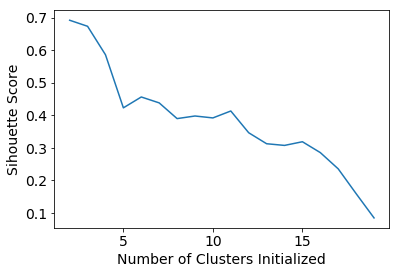

In [22]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")